# **🌱 EPOCH 비기너 세션 2주차 복습문제**



---



## **1️⃣ 다음 시간별 온도 데이터를 생성하고, 몇 가지 분석을 수행하세요.**
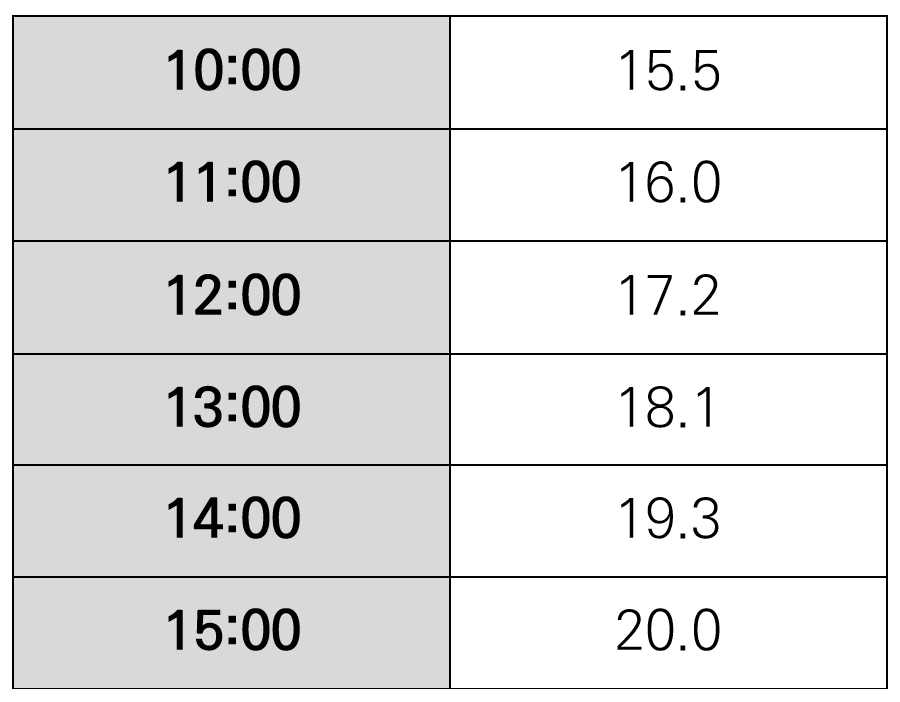

### (0) 데이터를 생성하세요.

In [25]:
from pandas import Series
data=[15.5, 16.0,17.2,18.1,19.3,20.0]
index=["10:00","11:00","12:00","13:00","14:00","15:00"]
s=Series(data=data,index=index)
print(s)

10:00    15.5
11:00    16.0
12:00    17.2
13:00    18.1
14:00    19.3
15:00    20.0
dtype: float64


### (1) 오후 12시와 오후 2시의 온도를 출력하세요.

In [26]:
print(s.loc[["12:00","14:00"]])

12:00    17.2
14:00    19.3
dtype: float64


In [27]:
print(s.iloc[[2,4]])

12:00    17.2
14:00    19.3
dtype: float64


### (2) 온도가 18도 이상인 시간을 추출하세요.

In [28]:
cond=s>=18
print(s[cond].index)

Index(['13:00', '14:00', '15:00'], dtype='object')


### (3) 온도를 기준으로 내림차순으로 정렬하세요.

In [29]:
s2=s.sort_values(ascending=False)
print(s2)

15:00    20.0
14:00    19.3
13:00    18.1
12:00    17.2
11:00    16.0
10:00    15.5
dtype: float64


### (4) 온도가 높은 순으로 순위를 매기세요.

In [30]:
print(s.rank(ascending=False)) #온도 출력은?

10:00    6.0
11:00    5.0
12:00    4.0
13:00    3.0
14:00    2.0
15:00    1.0
dtype: float64


### (5) 모든 온도 값을 섭씨에서 화씨로 변환하세요.

```
# 변환식: F = C * 9/5 + 32
```



In [31]:
print(s*(9/5)+32)

10:00    59.90
11:00    60.80
12:00    62.96
13:00    64.58
14:00    66.74
15:00    68.00
dtype: float64


### (6) 오후 4시의 온도가 19.5도라고 합니다. 오후 4시의 온도를 생성한 데이터에 추가해주세요.

In [32]:
s.loc["16:00"]=19.5
print(s)

10:00    15.5
11:00    16.0
12:00    17.2
13:00    18.1
14:00    19.3
15:00    20.0
16:00    19.5
dtype: float64


## **2️⃣ 다음 주식 거래 데이터를 생성하고, 날짜별 주식 가격과 거래량을 분석하세요.**
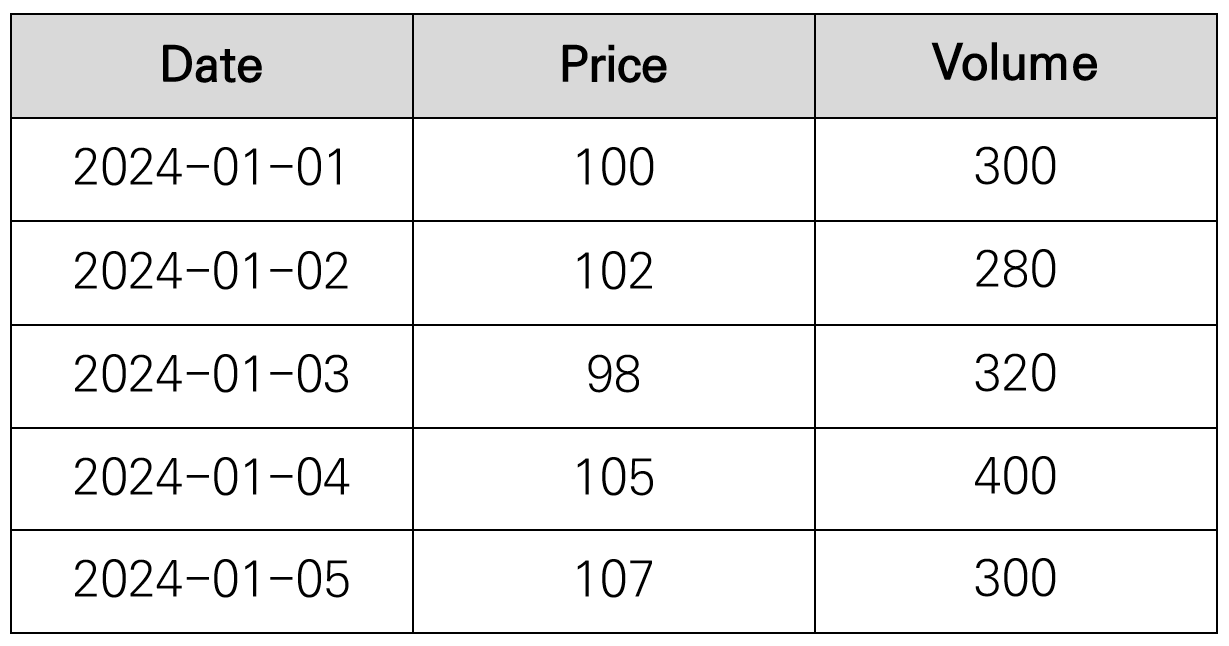

### (0) 데이터를 생성하세요.

In [33]:
from pandas import DataFrame
data=[
    ["2024-01-01",100,300],
    ["2024-01-02",102,280],
    ["2024-01-03",98,320],
    ["2024-01-04",105,400],
    ["2024-01-05",107,300]
]
columns=["Date","Price","Volume"]

df=DataFrame(data=data,columns=columns)
print(df)

         Date  Price  Volume
0  2024-01-01    100     300
1  2024-01-02    102     280
2  2024-01-03     98     320
3  2024-01-04    105     400
4  2024-01-05    107     300


### (1) 'Date' 열을 인덱스로 변경하세요.

In [34]:
df=df.set_index("Date")
print(df)

            Price  Volume
Date                     
2024-01-01    100     300
2024-01-02    102     280
2024-01-03     98     320
2024-01-04    105     400
2024-01-05    107     300


### (2) 2024년 1월 2일의 거래량을 구하세요.

In [35]:
df2=df[["Volume"]] #날짜,거래량 데이터프레임 d2
print(df2.loc['2024-01-02'])

Volume    280
Name: 2024-01-02, dtype: int64


### (3) 주식 가격이 \$100 이상이고 $105 이하인 날의 거래량을 필터링하세요.

In [36]:
print(df2[(df["Price"] >= 100) & (df["Price"] <= 105)])

            Volume
Date              
2024-01-01     300
2024-01-02     280
2024-01-04     400


In [37]:
cond=(df["Price"]>=100)&(df["Price"]<=105)
print(df.loc[cond])

            Price  Volume
Date                     
2024-01-01    100     300
2024-01-02    102     280
2024-01-04    105     400


In [38]:
cond=(df["Price"]>=100)&(df["Price"]<=105)
print(df.loc[cond]["Volume"])

Date
2024-01-01    300
2024-01-02    280
2024-01-04    400
Name: Volume, dtype: int64


### (4) 주식 가격이 $105 이상이고 거래량이 300 미만인 경우, 거래량을 350으로 대체하고 그 데이터를 필터링하세요.

In [39]:
cond = (df["Price"] >= 105) & (df["Volume"] < 300)
df.loc[cond, "Volume"] = 350
print(df)

df2=df[df["Volume"]==350]
print(df2)

            Price  Volume
Date                     
2024-01-01    100     300
2024-01-02    102     280
2024-01-03     98     320
2024-01-04    105     400
2024-01-05    107     300
Empty DataFrame
Columns: [Price, Volume]
Index: []


In [40]:
cond

,0
Date,
2024-01-01,False
2024-01-02,False
2024-01-03,False
2024-01-04,False
2024-01-05,False


## **3️⃣ 'sales_data.csv' 파일을 불러와 제품별 수익을 분석하세요.**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
# 데이터 불러와, '데이터명'에 할당하기
sales_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv')

# 할당한 데이터를 DataFrame으로 설정
data = pd.DataFrame(sales_data)

# 데이터 확인
print(data)

           Date    Product  Sales  Profit
0    2023-01-01  Product A  12000    3000
1    2023-01-02  Product B   8000    2000
2    2023-01-03  Product C  15000    3500
3    2023-01-04  Product D  20000    5000
4    2023-01-05  Product E   9000    1800
..          ...        ...    ...     ...
995  2025-09-22  Product A  12000    3000
996  2025-09-23  Product B   8000    2000
997  2025-09-24  Product C  15000    3500
998  2025-09-25  Product D  20000    5000
999  2025-09-26  Product E   9000    1800

[1000 rows x 4 columns]


### (1) 매출 데이터의 첫 10개의 행을 출력하세요.

In [43]:
data.head(10)

,Date,Product,Sales,Profit
0,2023-01-01,Product A,12000,3000
1,2023-01-02,Product B,8000,2000
2,2023-01-03,Product C,15000,3500
3,2023-01-04,Product D,20000,5000
4,2023-01-05,Product E,9000,1800
5,2023-01-06,Product A,12000,3000
6,2023-01-07,Product B,8000,2000
7,2023-01-08,Product C,15000,3500
8,2023-01-09,Product D,20000,5000
9,2023-01-10,Product E,9000,1800


### (2) 매출이 $10,000 이상인 행만 필터링하세요.

In [44]:
data2 = data[data["Sales"] >= 10000]
print(data2)

           Date    Product  Sales  Profit
0    2023-01-01  Product A  12000    3000
2    2023-01-03  Product C  15000    3500
3    2023-01-04  Product D  20000    5000
5    2023-01-06  Product A  12000    3000
7    2023-01-08  Product C  15000    3500
..          ...        ...    ...     ...
992  2025-09-19  Product C  15000    3500
993  2025-09-20  Product D  20000    5000
995  2025-09-22  Product A  12000    3000
997  2025-09-24  Product C  15000    3500
998  2025-09-25  Product D  20000    5000

[600 rows x 4 columns]


### (3) 매출이 $20,000 이상인 행들의 인덱스를 추출하고, 해당 행의 수익을 추출하세요.

In [45]:
df3=data[data["Sales"]>=20000]
print(df3.index)

print(df3[["Profit"]])

Index([  3,   8,  13,  18,  23,  28,  33,  38,  43,  48,
       ...
       953, 958, 963, 968, 973, 978, 983, 988, 993, 998],
      dtype='int64', length=200)
     Profit
3      5000
8      5000
13     5000
18     5000
23     5000
..      ...
978    5000
983    5000
988    5000
993    5000
998    5000

[200 rows x 1 columns]


### (4) 매출이 가장 큰 데이터의 날짜와 제품을 출력하세요.

In [46]:
# 'Sales' 열에서 최댓값 찾기
max_sales = data['Sales'].max()

df4=data[data["Sales"]==max_sales]

print(df4[["Date","Product"]])

           Date    Product
3    2023-01-04  Product D
8    2023-01-09  Product D
13   2023-01-14  Product D
18   2023-01-19  Product D
23   2023-01-24  Product D
..          ...        ...
978  2025-09-05  Product D
983  2025-09-10  Product D
988  2025-09-15  Product D
993  2025-09-20  Product D
998  2025-09-25  Product D

[200 rows x 2 columns]
